<a href="https://colab.research.google.com/github/ClarisseAlvarenga/btc_ibm_desafio_cocamar/blob/master/Desafio4_IBM_Algar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONHECER E EXPLORAR O DATASET DA ALGAR

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#para setar o número de linhas e colunas visíveis no dataset
pd.set_option('display.max_rows', 200)

In [22]:
algar = pd.read_csv('algar-dataset-treino.csv')

In [23]:
algar.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,1,2,3,M,61,2,2,Engenheiro,2,Casado,5130,24907,1,1,Não,23,4,4,80,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,1,5,4,F,56,3,1,Engenheiro,3,Casado,2909,23159,1,1,Sim,11,3,3,80,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,1,7,1,M,40,3,1,Tecnico,2,Casado,3468,16632,9,1,Não,12,3,4,80,1,6,3,3,2,2,2,2,Não
3,32,Misto,1005,Engenharia,2,Superior incompleto,Ciências das natureza,1,8,4,M,79,3,1,Tecnico,4,Solteiro,3068,11864,0,1,Não,13,3,3,80,0,8,2,2,7,7,3,6,Não
4,59,Misto,1324,Engenharia,3,Superior completo,Medicina,1,10,3,F,81,4,1,Tecnico,1,Casado,2670,9964,4,1,Sim,20,4,1,80,3,12,3,2,1,0,0,0,Não


In [24]:
algar.Contratar.value_counts(normalize=True)

Não    0.859854
Sim    0.140146
Name: Contratar, dtype: float64

In [25]:
algar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       1370 non-null   int64 
 1   Local de trabalho                           1370 non-null   object
 2   Pontuação teste                             1370 non-null   int64 
 3   Departmento                                 1370 non-null   object
 4   Distancia casa-trabalho                     1370 non-null   int64 
 5   Educacao                                    1370 non-null   object
 6   Area                                        1370 non-null   object
 7   Possui carro                                1370 non-null   int64 
 8   Subordinado                                 1370 non-null   int64 
 9   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 10  Genero                  

In [26]:
#vendo porcentagem contratação por gênero
pd.crosstab(algar.Genero, algar.Contratar)

Contratar,Não,Sim
Genero,,
F,479,73
M,699,119


In [27]:
119/699

0.17024320457796852

In [28]:
73/479

0.1524008350730689

In [29]:
idade_contratados = algar[algar['Contratar'] == 'Sim']['Idade']
idade_nao_contratados = algar[algar['Contratar'] == 'Não']['Idade']


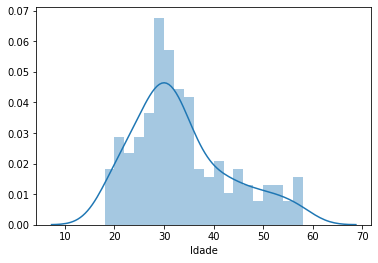

In [30]:
sns.distplot(idade_contratados, bins=20);

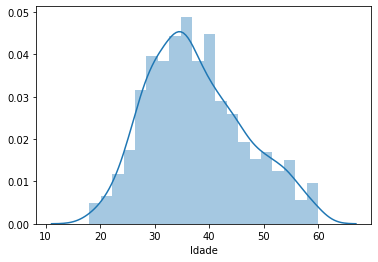

In [31]:
sns.distplot(idade_nao_contratados, bins=20)

In [16]:
len(idade_contratados)

192

In [17]:
len(idade_nao_contratados)

1178

In [33]:
pd.crosstab(algar['Idade'],algar.Contratar)

Contratar,Não,Sim
Idade,,
18,4,4
19,3,3
20,5,5
21,6,6
22,10,5
23,10,4
24,19,6
25,17,5
26,26,11


In [34]:
algar.columns

Index(['Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Possui carro',
       'Subordinado', 'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação',
       'Horas de trabalho padrão', 'Beneficios', 'Anos de experiencia',
       'Horas de treinamento ultimo ano', 'Estilo de vida',
       'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência', 'Contratar'],
      dtype='object')

In [36]:
pd.crosstab(algar['Necessita de hora extra'], algar.Contratar)

Contratar,Não,Sim
Necessita de hora extra,,
Não,901,91
Sim,277,101


In [38]:
#busca só as variáveis numéricas
numericas = algar.select_dtypes(include='number')
#só as categóricas
categoricas_puras = algar.select_dtypes(exclude='number')

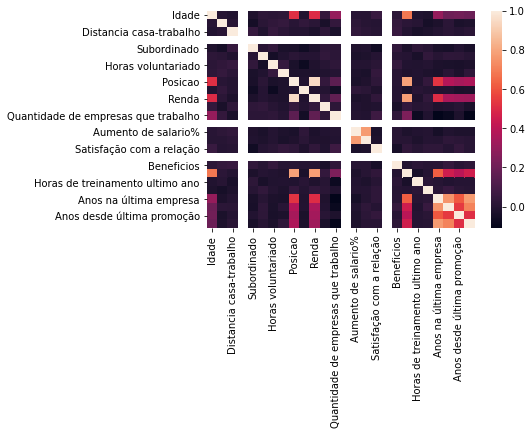

In [40]:
#correlações
numericas.corr()
sns.heatmap(numericas.corr())

In [45]:
#função para criar heatmap
def criar_heatmap(corr):
  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=np.bool))

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(18, 11))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

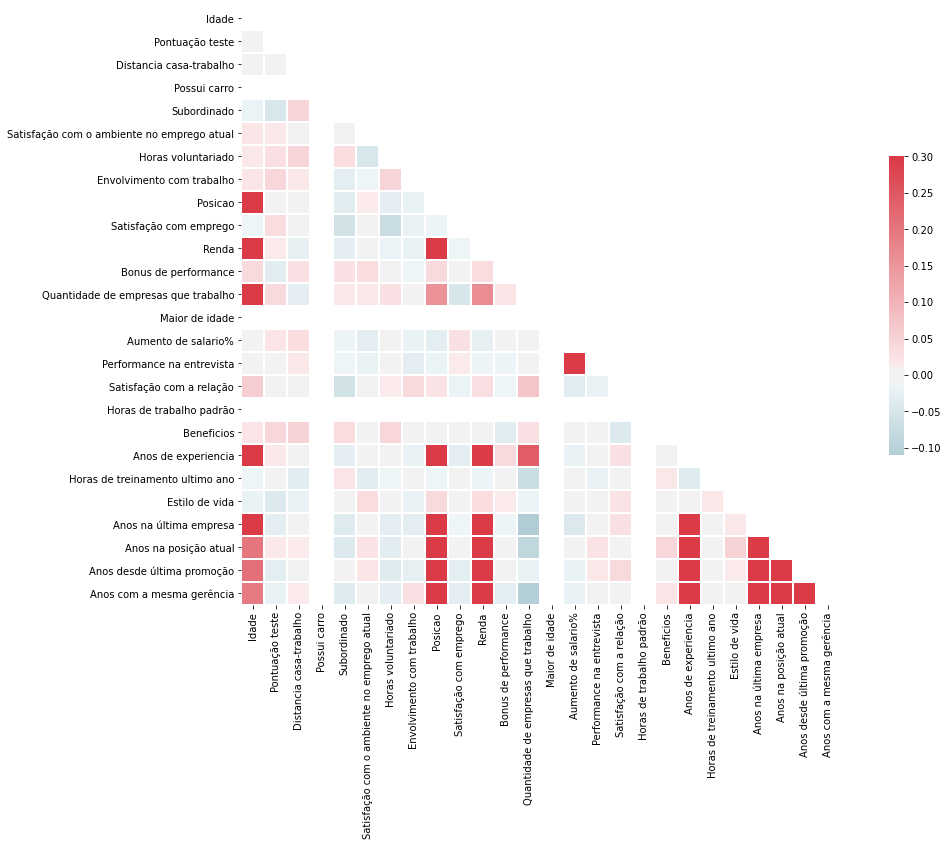

In [46]:
criar_heatmap(numericas.corr())

In [47]:
contratados = algar[algar['Contratar'] == 'Sim']
nao_contratados = algar[algar['Contratar'] == 'Não']

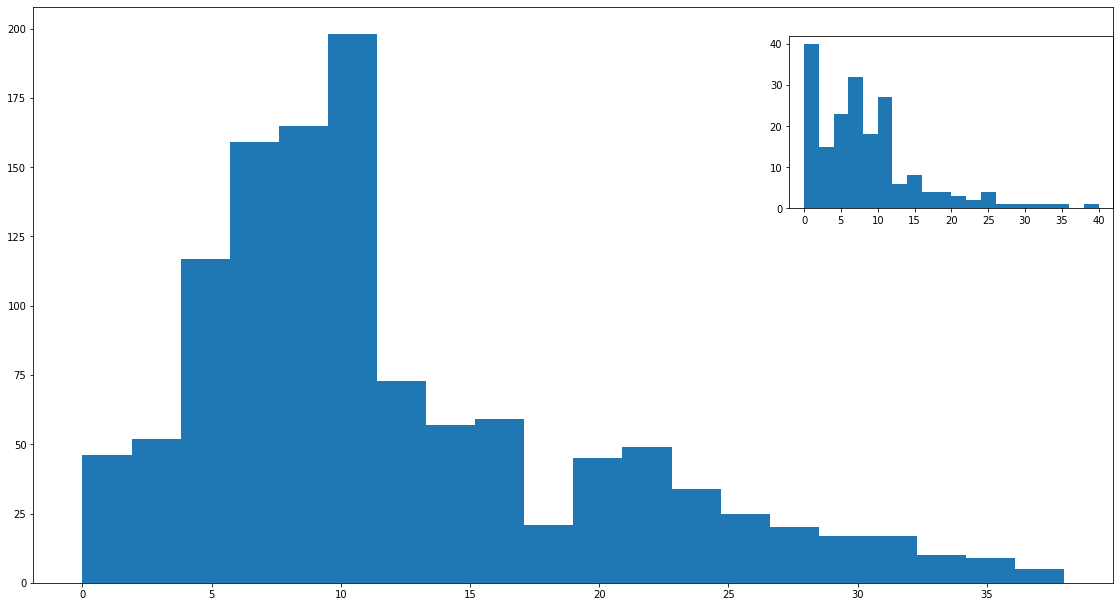

In [61]:
#criando uma área de plotagem
fig = plt.figure(figsize=(15,8))
#declarando os eixos
eixo = fig.add_axes([0,0,1,1]) #lista que cria o eixo
eixo2 = fig.add_axes([0.7,0.65,0.3,0.3]) #alterando a posição para o canto

eixo.hist(nao_contratados['Anos de experiencia'], bins=20)
eixo2.hist(contratados['Anos de experiencia'], bins=20);

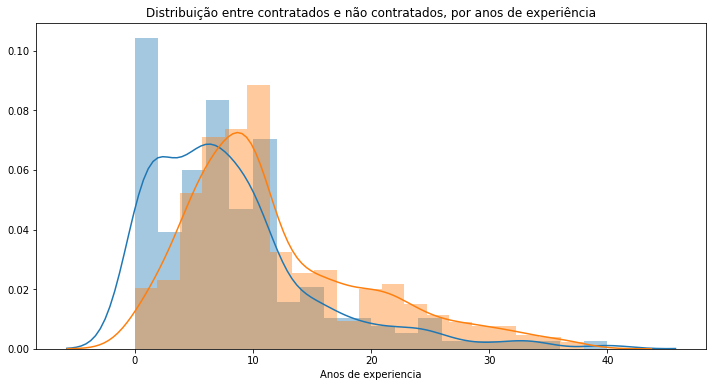

In [65]:
plt.figure(figsize=(12,6))
plt.title('Distribuição entre contratados e não contratados, por anos de experiência')
eixo1 = sns.distplot(contratados['Anos de experiencia'], bins = 20)
eixo2 = sns.distplot(nao_contratados['Anos de experiencia'], bins=20)


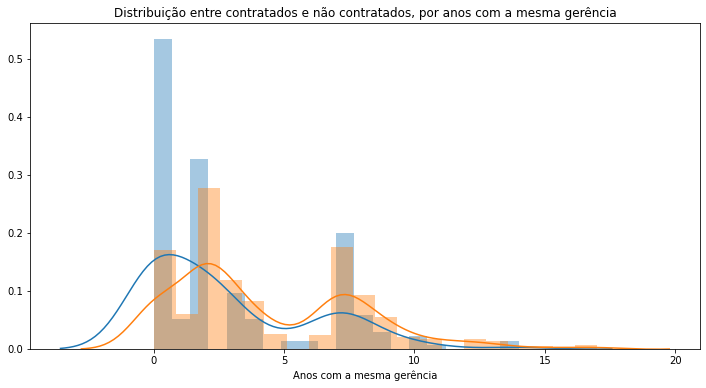

In [66]:
plt.figure(figsize=(12,6))
plt.title('Distribuição entre contratados e não contratados, por anos com a mesma gerência')
eixo1 = sns.distplot(contratados['Anos com a mesma gerência'], bins = 20)
eixo2 = sns.distplot(nao_contratados['Anos com a mesma gerência'], bins=20)


In [67]:
algar.columns

Index(['Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Possui carro',
       'Subordinado', 'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação',
       'Horas de trabalho padrão', 'Beneficios', 'Anos de experiencia',
       'Horas de treinamento ultimo ano', 'Estilo de vida',
       'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência', 'Contratar'],
      dtype='object')

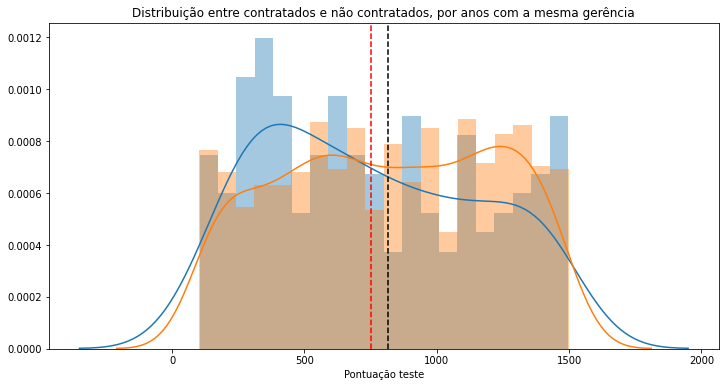

In [78]:
plt.figure(figsize=(12,6))
plt.title('Distribuição entre contratados e não contratados, por anos com a mesma gerência')
eixo1 = sns.distplot(contratados['Pontuação teste'], bins = 20)
eixo2 = sns.distplot(nao_contratados['Pontuação teste'], bins=20)
eixo1.axvline(nao_contratados['Pontuação teste'].mean(), color= 'k', linestyle='--')
eixo1.axvline(contratados['Pontuação teste'].mean(), color= 'r', linestyle='--');


In [80]:
algar['Performance na entrevista'].nunique()

2

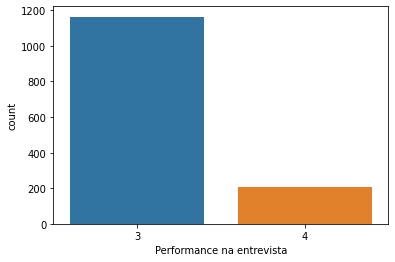

In [82]:
#geral
sns.countplot(algar['Performance na entrevista']);

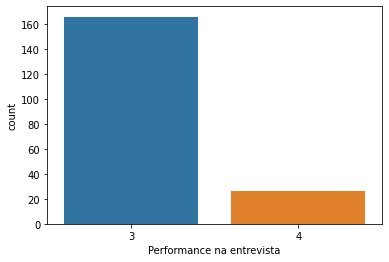

In [83]:
#contratados
sns.countplot(contratados['Performance na entrevista']);

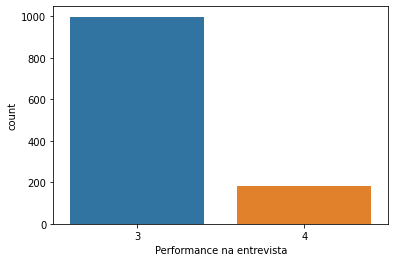

In [84]:
#não contratados
sns.countplot(nao_contratados['Performance na entrevista']);

In [85]:
contratados['Performance na entrevista'].value_counts(normalize=True)

3    0.864583
4    0.135417
Name: Performance na entrevista, dtype: float64

In [86]:
nao_contratados['Performance na entrevista'].value_counts(normalize=True)

3    0.847199
4    0.152801
Name: Performance na entrevista, dtype: float64

In [87]:
categoricas_puras.head()

,Local de trabalho,Departmento,Educacao,Area,Genero,Cargo,Estado civil,Necessita de hora extra,Contratar
0,Cliente,Engenharia,Médio completo,Ciências das natureza,M,Engenheiro,Casado,Não,Não
1,Misto,Engenharia,Superior incompleto - cursando,Ciências das natureza,F,Engenheiro,Casado,Sim,Não
2,Cliente,Engenharia,Médio completo,Medicina,M,Tecnico,Casado,Não,Não
3,Misto,Engenharia,Superior incompleto,Ciências das natureza,M,Tecnico,Solteiro,Não,Não
4,Misto,Engenharia,Superior completo,Medicina,F,Tecnico,Casado,Sim,Não


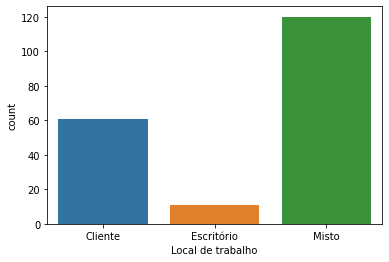

In [93]:
sns.countplot(contratados['Local de trabalho'].sort_values());

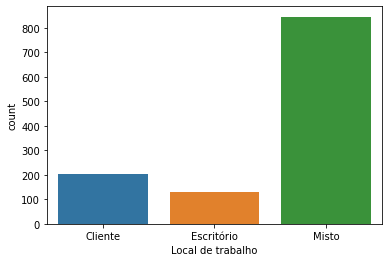

In [95]:
sns.countplot(nao_contratados['Local de trabalho'].sort_values());

In [96]:
numericas

,Idade,Pontuação teste,Distancia casa-trabalho,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
0,49,279,8,1,2,3,61,2,2,2,5130,24907,1,1,23,4,4,80,1,10,3,3,10,7,1,7
1,33,1392,3,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
2,27,591,2,1,7,1,40,3,1,2,3468,16632,9,1,12,3,4,80,1,6,3,3,2,2,2,2
3,32,1005,2,1,8,4,79,3,1,4,3068,11864,0,1,13,3,3,80,0,8,2,2,7,7,3,6
4,59,1324,3,1,10,3,81,4,1,1,2670,9964,4,1,20,4,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,23,638,9,1,2023,4,33,3,1,1,1790,26956,1,1,19,3,1,80,1,1,3,2,1,0,1,0
1366,29,1092,1,1,2027,1,36,3,1,4,4787,26124,9,1,14,3,2,80,3,4,3,4,2,2,2,2
1367,56,310,7,1,2032,4,72,3,1,3,2339,3666,8,1,11,3,4,80,1,14,4,1,10,9,9,8
1368,50,878,1,1,2044,2,94,3,2,3,6728,14255,7,1,12,3,4,80,2,12,3,3,6,3,0,1


In [108]:
numericas['Satisfação com emprego'].unique()

array([2, 3, 4, 1])

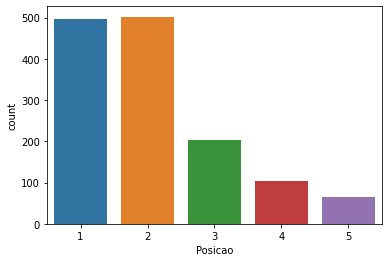

In [103]:
sns.countplot(algar['Posicao']);


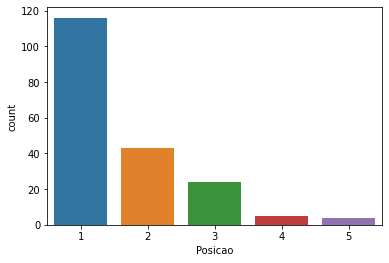

In [104]:
sns.countplot(contratados['Posicao']);

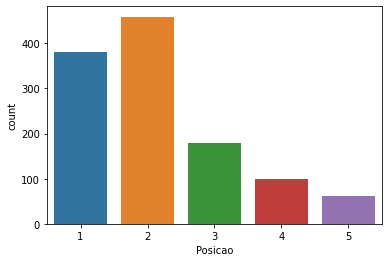

In [105]:
sns.countplot(nao_contratados['Posicao']);

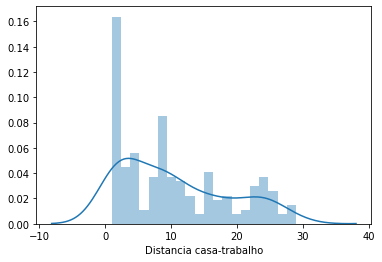

In [113]:
sns.distplot(contratados['Distancia casa-trabalho'], bins=20);

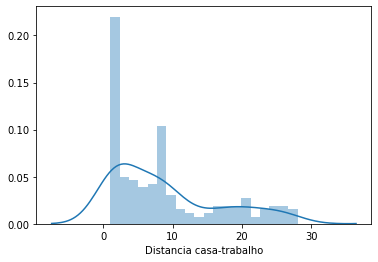

In [114]:
sns.distplot(nao_contratados['Distancia casa-trabalho'].sample(contratados.shape[0]), bins=20);

In [115]:
algar.Departmento.unique()

array(['Engenharia', 'Vendas', 'RH'], dtype=object)

In [116]:
algar.Educacao.unique()

array(['Médio completo', 'Superior incompleto - cursando',
       'Superior incompleto', 'Superior completo', 'Pós-gradução'],
      dtype=object)

In [117]:
algar.shape

(1370, 35)

In [118]:
contratados.shape

(192, 35)

In [119]:
algar.columns

Index(['Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Possui carro',
       'Subordinado', 'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação',
       'Horas de trabalho padrão', 'Beneficios', 'Anos de experiencia',
       'Horas de treinamento ultimo ano', 'Estilo de vida',
       'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência', 'Contratar'],
      dtype='object')

### Variáveis

In [120]:
flag = []
continuas = []
nominais = []
ordinais = []
categoricas = []
typeless = []



In [126]:
#colocando valores numa lista
continuas.pop()

['Distancia casa-trabalho', 'Idade']

In [127]:
continuas

['Distancia casa-trabalho']

In [130]:
continuas.append('Idade')

In [132]:
nominais.append('Local de trabalho')

In [133]:
continuas.append('Pontuação teste')

In [134]:
nominais.append('Departamento')

In [135]:
algar.columns

Index(['Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Possui carro',
       'Subordinado', 'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação',
       'Horas de trabalho padrão', 'Beneficios', 'Anos de experiencia',
       'Horas de treinamento ultimo ano', 'Estilo de vida',
       'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência', 'Contratar'],
      dtype='object')

In [136]:
colunas_faltantes = ['Educacao', 'Area', 'Possui carro',
       'Subordinado', 'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação',
       'Horas de trabalho padrão', 'Beneficios', 'Anos de experiencia',
       'Horas de treinamento ultimo ano', 'Estilo de vida',
       'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência', 'Contratar']

In [137]:
continuas

['Distancia casa-trabalho', 'Idade', 'Pontuação teste']

In [138]:
algar.Educacao

0                       Médio completo
1       Superior incompleto - cursando
2                       Médio completo
3                  Superior incompleto
4                    Superior completo
                     ...              
1365                 Superior completo
1366    Superior incompleto - cursando
1367               Superior incompleto
1368    Superior incompleto - cursando
1369                 Superior completo
Name: Educacao, Length: 1370, dtype: object

In [139]:
categoricas.append('Educacao')

In [141]:
colunas_faltantes.pop(0)

'Distancia casa-trabalho'

In [142]:
colunas_faltantes.pop(0)

'Educacao'

In [143]:
colunas_faltantes

['Area',
 'Possui carro',
 'Subordinado',
 'Satisfação com o ambiente no emprego atual',
 'Genero',
 'Horas voluntariado',
 'Envolvimento com trabalho',
 'Posicao',
 'Cargo',
 'Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

In [144]:
algar.Area

0       Ciências das natureza
1       Ciências das natureza
2                    Medicina
3       Ciências das natureza
4                    Medicina
                ...          
1365                Marketing
1366                 Medicina
1367        Faculdade Técnica
1368    Ciências das natureza
1369                Marketing
Name: Area, Length: 1370, dtype: object

In [145]:
nominais.append('Area')
colunas_faltantes.pop(0)

'Area'

In [147]:
colunas_faltantes

['Possui carro',
 'Subordinado',
 'Satisfação com o ambiente no emprego atual',
 'Genero',
 'Horas voluntariado',
 'Envolvimento com trabalho',
 'Posicao',
 'Cargo',
 'Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

In [149]:
flag.append('Possui carro')
colunas_faltantes.pop(0)

'Possui carro'

In [150]:
colunas_faltantes

['Subordinado',
 'Satisfação com o ambiente no emprego atual',
 'Genero',
 'Horas voluntariado',
 'Envolvimento com trabalho',
 'Posicao',
 'Cargo',
 'Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

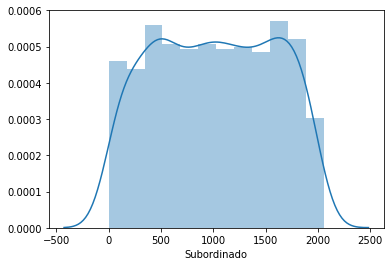

In [152]:
sns.distplot(algar.Subordinado)

flag = []
continuas = []
nominais = []
ordinais = []
categoricas = []
typeless = []


In [155]:
continuas.append('Subordinado')
colunas_faltantes.pop(0)

'Subordinado'

In [156]:
algar['Satisfação com o ambiente no emprego atual']

0       3
1       4
2       1
3       4
4       3
       ..
1365    4
1366    1
1367    4
1368    2
1369    4
Name: Satisfação com o ambiente no emprego atual, Length: 1370, dtype: int64

In [157]:
ordinais.append('Satisfação com o ambiente no emprego atual')
colunas_faltantes.pop(0)

'Satisfação com o ambiente no emprego atual'

In [158]:
colunas_faltantes

['Genero',
 'Horas voluntariado',
 'Envolvimento com trabalho',
 'Posicao',
 'Cargo',
 'Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

In [159]:
algar.Genero

0       M
1       F
2       M
3       M
4       F
       ..
1365    M
1366    M
1367    M
1368    M
1369    M
Name: Genero, Length: 1370, dtype: object

In [160]:
nominais.append('Genero')
colunas_faltantes.pop(0)

'Genero'

In [161]:
colunas_faltantes

['Horas voluntariado',
 'Envolvimento com trabalho',
 'Posicao',
 'Cargo',
 'Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

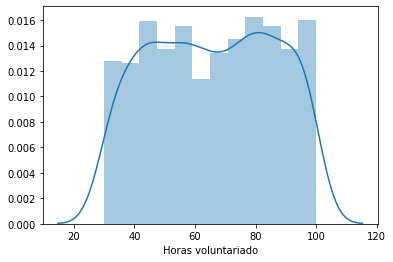

In [164]:
sns.distplot(algar['Horas voluntariado'])

In [168]:
algar['Horas voluntariado'].max()

100

In [169]:
continuas.append('Horas voluntariado')
colunas_faltantes.pop(0)

'Horas voluntariado'

In [170]:
colunas_faltantes

['Envolvimento com trabalho',
 'Posicao',
 'Cargo',
 'Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

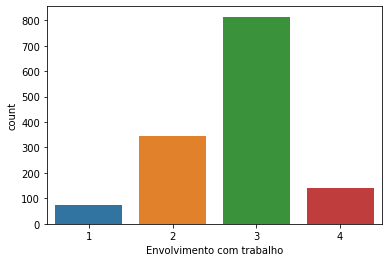

In [177]:
sns.countplot(algar['Envolvimento com trabalho'])

In [178]:
ordinais.append('Envolvimento com trabalho')
colunas_faltantes.pop(0)

'Envolvimento com trabalho'

In [179]:
colunas_faltantes

['Posicao',
 'Cargo',
 'Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

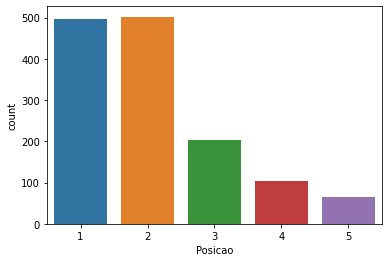

In [181]:
sns.countplot(algar.Posicao)

In [182]:
 ordinais.append('Posicao')
 colunas_faltantes.pop(0)

'Posicao'

In [183]:
colunas_faltantes

['Cargo',
 'Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

In [184]:
algar.Cargo

0            Engenheiro
1            Engenheiro
2               Tecnico
3               Tecnico
4               Tecnico
             ...       
1365    Vendedor junior
1366         Engenheiro
1367            Tecnico
1368     Vendedo senior
1369     Vendedo senior
Name: Cargo, Length: 1370, dtype: object

In [185]:
nominais.append('Cargo')

In [186]:
colunas_faltantes.pop(0)

'Cargo'

In [187]:
colunas_faltantes

['Satisfação com emprego',
 'Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

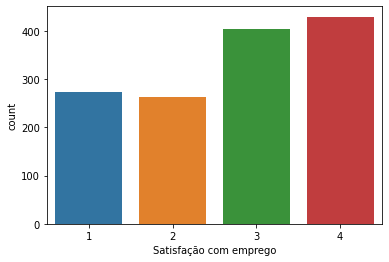

In [189]:
sns.countplot(algar['Satisfação com emprego'])

In [190]:
ordinais.append('Satisfação com emprego')
colunas_faltantes.pop(0)

'Satisfação com emprego'

In [191]:
colunas_faltantes

['Estado civil',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

In [193]:
nominais.append('Estado civil')

In [194]:
colunas_faltantes.pop(0)

'Estado civil'

In [195]:
colunas_faltantes

['Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Contratar']

In [196]:
algar.Renda

0        5130
1        2909
2        3468
3        3068
4        2670
        ...  
1365     1790
1366     4787
1367     2339
1368     6728
1369    10854
Name: Renda, Length: 1370, dtype: int64

In [197]:
continuas.append('Renda')

In [198]:
colunas_faltantes.pop(0)

'Renda'

In [199]:
flag.append('Contratar')
colunas_faltantes.pop()

'Contratar'

In [200]:
colunas_faltantes

['Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência']

In [202]:
continuas.append('Bonus de performance')

In [203]:
colunas_faltantes.pop(0)

'Bonus de performance'

In [204]:
colunas_faltantes

['Quantidade de empresas que trabalho',
 'Maior de idade',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência']

In [206]:
algar['Maior de idade'].unique()

array([1])

In [208]:
flag.append('Maior de idade')
colunas_faltantes.pop(1)

'Maior de idade'

In [209]:
colunas_faltantes

['Quantidade de empresas que trabalho',
 'Necessita de hora extra',
 'Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência']

In [210]:
algar['Necessita de hora extra'].unique()

array(['Não', 'Sim'], dtype=object)

In [211]:
flag.append('Necessita de hora extra')
colunas_faltantes.pop(1)

'Necessita de hora extra'

In [213]:
algar['Quantidade de empresas que trabalho'].unique()

array([1, 9, 0, 4, 6, 2, 5, 3, 7, 8])

In [214]:
continuas.append('Quantidade de empresas que trabalho')
colunas_faltantes.pop(0)

'Quantidade de empresas que trabalho'

In [215]:
colunas_faltantes

['Aumento de salario%',
 'Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência']

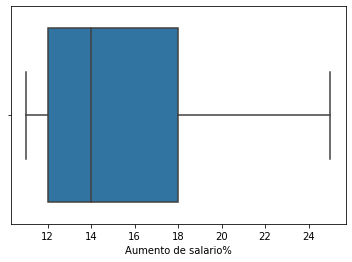

In [216]:
sns.boxplot(algar['Aumento de salario%'])

In [217]:
continuas.append('Aumento de salario%')
colunas_faltantes.pop(0)

'Aumento de salario%'

In [218]:
colunas_faltantes

['Performance na entrevista',
 'Satisfação com a relação',
 'Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência']

In [220]:
algar['Performance na entrevista'].unique()

array([4, 3])

In [222]:
ordinais.append('Performance na entrevista')
colunas_faltantes.pop(0)

'Performance na entrevista'

In [226]:
ordinais.append('Satisfação com a relação')
colunas_faltantes.pop(0)

'Satisfação com a relação'

In [227]:
colunas_faltantes

['Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Estilo de vida',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência']

In [228]:
algar['Estilo de vida'].unique()

array([3, 2, 4, 1])

In [229]:
categoricas.append('Estilo de vida')
colunas_faltantes.pop(4)

'Estilo de vida'

In [230]:
colunas_faltantes

['Horas de trabalho padrão',
 'Beneficios',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência']

In [232]:
algar['Horas de trabalho padrão'].unique()

array([80])

In [234]:
algar['Beneficios'].unique()

array([1, 0, 3, 2])

In [235]:
categoricas.append('Beneficios')
continuas.append('Horas de trabalho padrão')
colunas_faltantes.pop(0)

'Horas de trabalho padrão'

In [236]:
colunas_faltantes.pop(0)

'Beneficios'

In [238]:
algar['Horas de treinamento ultimo ano'].unique()

array([3, 2, 5, 1, 4, 6, 0])

In [239]:
continuas = continuas + colunas_faltantes

In [240]:
continuas

['Distancia casa-trabalho',
 'Idade',
 'Pontuação teste',
 'Subordinado',
 'Subordinado',
 'Subordinado',
 'Horas voluntariado',
 'Renda',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Aumento de salario%',
 'Horas de trabalho padrão',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Anos na última empresa',
 'Anos na posição atual',
 'Anos desde última promoção',
 'Anos com a mesma gerência']

In [241]:
continuas = set(continuas)

In [242]:
continuas

{'Anos com a mesma gerência',
 'Anos de experiencia',
 'Anos desde última promoção',
 'Anos na posição atual',
 'Anos na última empresa',
 'Aumento de salario%',
 'Bonus de performance',
 'Distancia casa-trabalho',
 'Horas de trabalho padrão',
 'Horas de treinamento ultimo ano',
 'Horas voluntariado',
 'Idade',
 'Pontuação teste',
 'Quantidade de empresas que trabalho',
 'Renda',
 'Subordinado'}

In [245]:
ordinais = set(ordinais)

In [247]:
flag = set(flag)

In [251]:
nominais.pop(1)

'Departamento'

In [250]:
algar.columns

Index(['Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Possui carro',
       'Subordinado', 'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Maior de idade', 'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação',
       'Horas de trabalho padrão', 'Beneficios', 'Anos de experiencia',
       'Horas de treinamento ultimo ano', 'Estilo de vida',
       'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência', 'Contratar'],
      dtype='object')

In [252]:
nominais.append('Departmento')

In [253]:
algar[nominais]

,Local de trabalho,Area,Genero,Cargo,Estado civil,Departmento
0,Cliente,Ciências das natureza,M,Engenheiro,Casado,Engenharia
1,Misto,Ciências das natureza,F,Engenheiro,Casado,Engenharia
2,Cliente,Medicina,M,Tecnico,Casado,Engenharia
3,Misto,Ciências das natureza,M,Tecnico,Solteiro,Engenharia
4,Misto,Medicina,F,Tecnico,Casado,Engenharia
...,...,...,...,...,...,...
1365,Misto,Marketing,M,Vendedor junior,Casado,Vendas
1366,Misto,Medicina,M,Engenheiro,Casado,Engenharia
1367,Cliente,Faculdade Técnica,M,Tecnico,Casado,Engenharia
1368,Misto,Ciências das natureza,M,Vendedo senior,Divorciado,Vendas


In [254]:
pd.crosstab(algar.Departmento, algar.Genero)

Genero,F,M
Departmento,,
Engenharia,361,535
RH,18,42
Vendas,173,241


In [256]:
pd.crosstab(algar.Area, algar.Genero, values=algar['Renda'], aggfunc='mean')

Genero,F,M
Area,,
Ciências das natureza,6467.163717,6542.979228
Ciências humanas,10621.857143,6494.333333
Faculdade Técnica,7084.938776,4978.723684
Marketing,7613.639344,7319.953488
Medicina,6488.098901,6639.964143
Outros,6275.777778,6209.120000


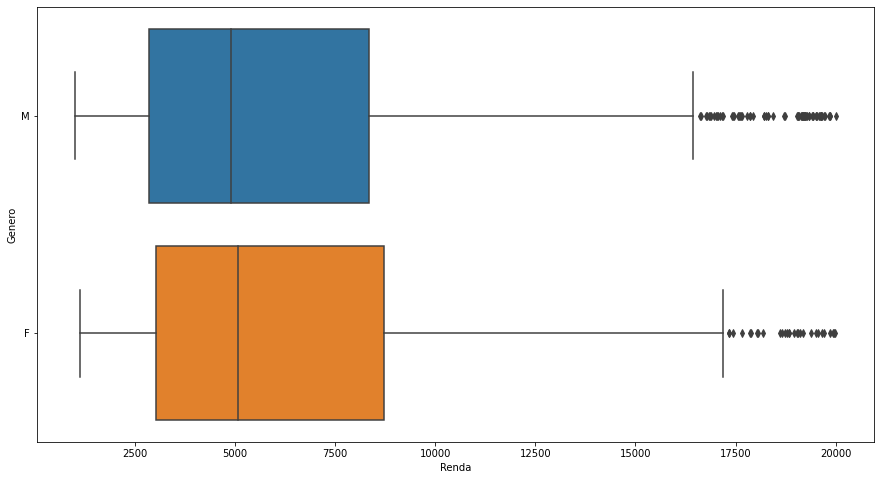

In [258]:
plt.figure(figsize=(15,8))
sns.boxplot(algar['Renda'], algar['Genero']);

In [259]:
print(nominais)
print(ordinais)
print(flag)
print(continuas)

['Local de trabalho', 'Area', 'Genero', 'Cargo', 'Estado civil', 'Departmento']
{'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego', 'Satisfação com a relação', 'Satisfação com o ambiente no emprego atual', 'Performance na entrevista'}
{'Maior de idade', 'Possui carro', 'Necessita de hora extra', 'Contratar'}
{'Horas de trabalho padrão', 'Horas voluntariado', 'Aumento de salario%', 'Pontuação teste', 'Bonus de performance', 'Quantidade de empresas que trabalho', 'Anos de experiencia', 'Horas de treinamento ultimo ano', 'Renda', 'Idade', 'Anos desde última promoção', 'Anos com a mesma gerência', 'Anos na última empresa', 'Distancia casa-trabalho', 'Subordinado', 'Anos na posição atual'}


In [272]:
pd.crosstab(nao_contratados['Estado civil'], nao_contratados.Genero)

Genero,F,M
Estado civil,,
Casado,226,332
Divorciado,106,179
Solteiro,147,188


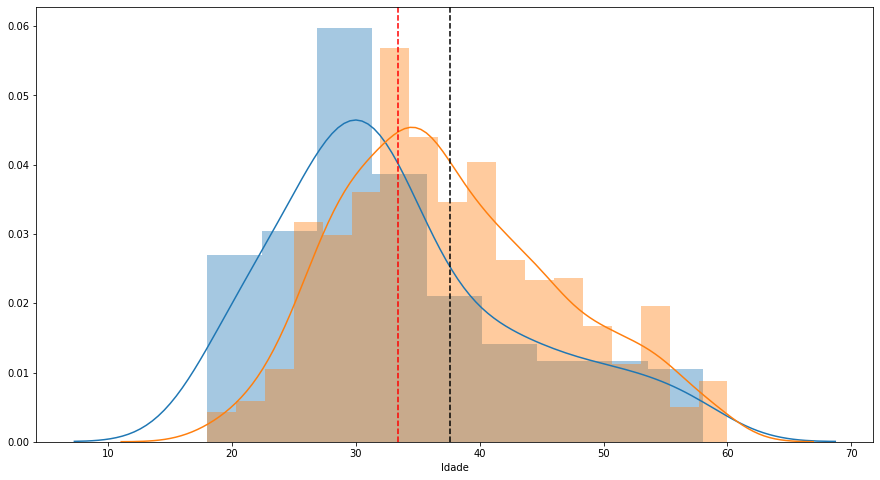

In [269]:
plt.figure(figsize=(15,8))
eixo1 = sns.distplot(contratados.Idade)
eixo2 = sns.distplot(nao_contratados.Idade)
eixo1.axvline(nao_contratados['Idade'].mean(), color= 'k', linestyle='--')
eixo1.axvline(contratados['Idade'].mean(), color= 'r', linestyle='--');


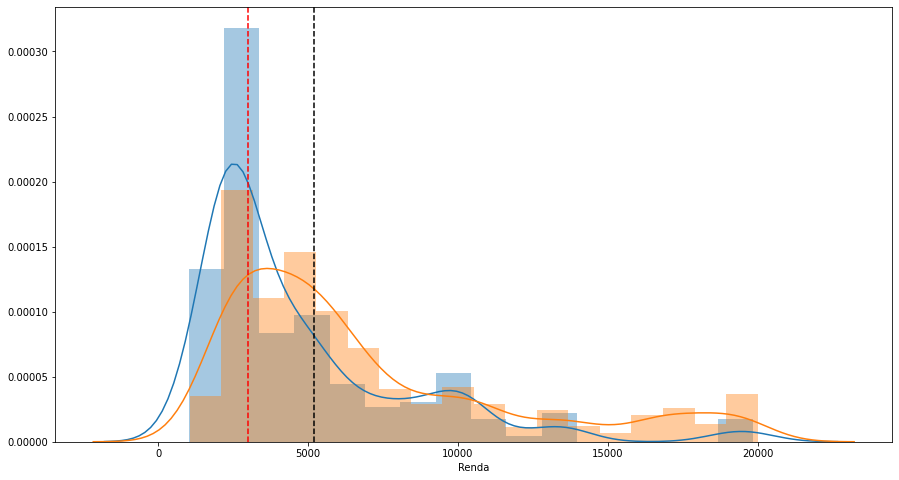

In [271]:
plt.figure(figsize=(15,8))
eixo1 = sns.distplot(contratados.Renda)
eixo2 = sns.distplot(nao_contratados.Renda)
eixo1.axvline(nao_contratados['Renda'].median(), color= 'k', linestyle='--')
eixo1.axvline(contratados['Renda'].median(), color= 'r', linestyle='--');

In [274]:
pd.crosstab(contratados['Local de trabalho'], contratados.Genero)

Genero,F,M
Local de trabalho,,
Cliente,23,38
Escritório,4,7
Misto,46,74


In [275]:
type(ordinais)

set

In [276]:
ordinais = list(ordinais)

In [277]:
type(ordinais)

list

In [278]:
algar[ordinais]

,Envolvimento com trabalho,Posicao,Satisfação com emprego,Satisfação com a relação,Satisfação com o ambiente no emprego atual,Performance na entrevista
0,2,2,2,4,3,4
1,3,1,3,3,4,3
2,3,1,2,4,1,3
3,3,1,4,3,4,3
4,4,1,1,1,3,4
...,...,...,...,...,...,...
1365,3,1,1,1,4,3
1366,3,1,4,2,1,3
1367,3,1,3,4,4,3
1368,3,2,3,4,2,3


In [279]:
continuas = list(continuas)

In [281]:
dados = algar[continuas]

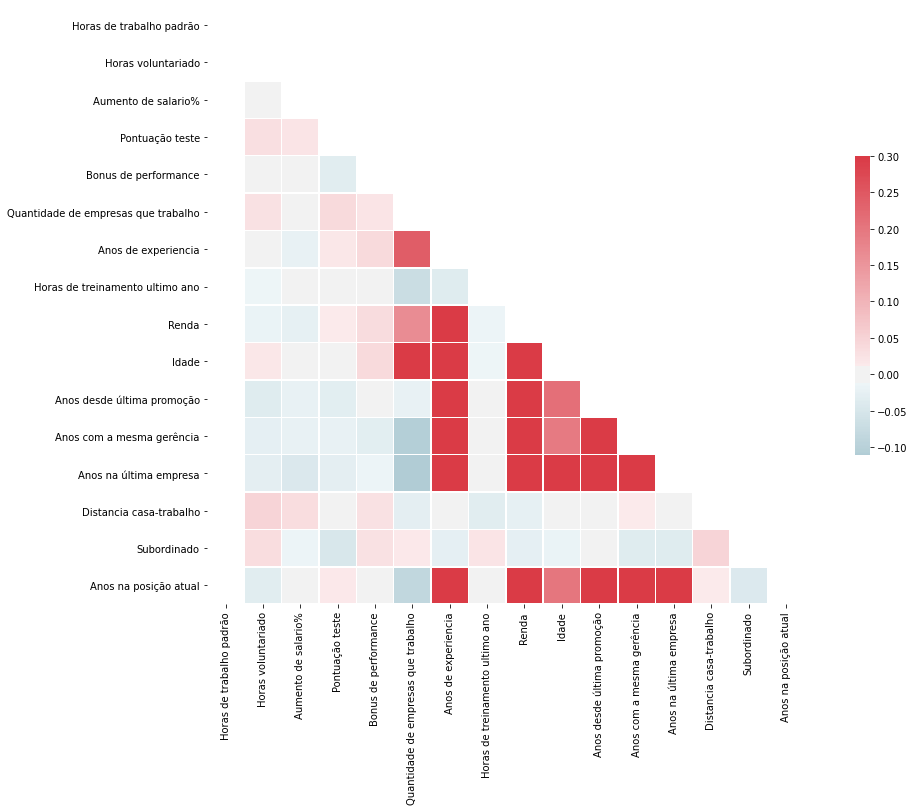

In [282]:
criar_heatmap(dados.corr())

In [298]:
#comparando a Renda
algar.groupby(by=["Contratar"]).mean()['Renda']

Contratar
Não    6869.691851
Sim    4750.921875
Name: Renda, dtype: float64

In [301]:
algar.groupby(by=["Contratar"]).median()

,Idade,Pontuação teste,Distancia casa-trabalho,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
Contratar,,,,,,,,,,,,,,,,,,,,,,,,,,
Não,37.625637,816.495756,8.890492,1.0,981.062818,2.774194,65.868421,2.775042,2.154499,2.775042,6869.691851,14294.518676,2.663837,1.0,15.213073,3.152801,2.747029,80.0,0.842954,11.903226,2.832767,2.783531,7.348048,4.463497,2.245331,4.356537
Sim,33.380208,750.520833,10.421875,1.0,1203.786458,2.458333,65.432292,2.567708,1.635417,2.406250,4750.921875,14308.223958,2.947917,1.0,14.937500,3.135417,2.557292,80.0,0.567708,8.010417,2.604167,2.682292,5.088542,2.901042,1.968750,2.822917


In [302]:
continuas.append('Contratar')

In [304]:
dados = algar[continuas]

In [309]:
dados.groupby(by=["Contratar"]).median()

,Horas de trabalho padrão,Horas voluntariado,Aumento de salario%,Pontuação teste,Bonus de performance,Quantidade de empresas que trabalho,Anos de experiencia,Horas de treinamento ultimo ano,Renda,Idade,Anos desde última promoção,Anos com a mesma gerência,Anos na última empresa,Distancia casa-trabalho,Subordinado,Anos na posição atual
Contratar,,,,,,,,,,,,,,,,
Não,80.0,66.0,14.0,822.0,14220.0,2.0,10.0,3.0,5207.5,36.0,1.0,3.0,5.5,7.0,978.5,3.0
Sim,80.0,65.5,14.0,698.0,14318.5,1.0,6.5,2.0,3007.0,31.0,1.0,2.0,3.0,9.0,1162.5,2.0


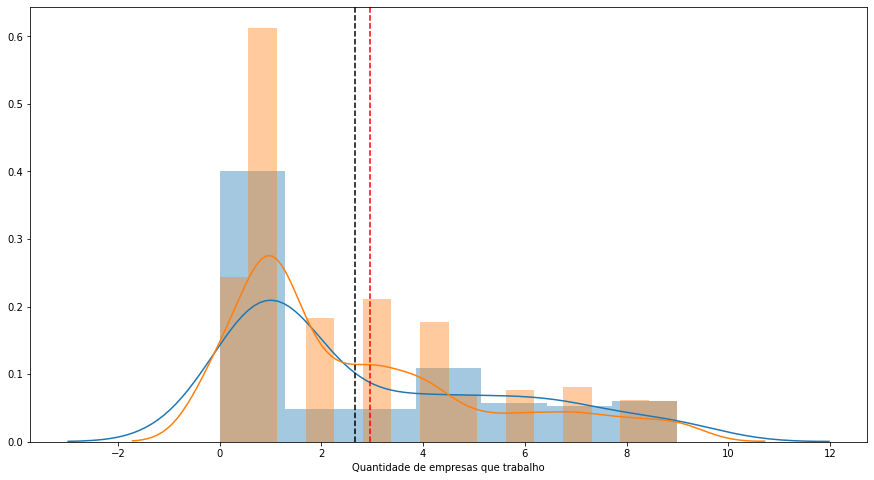

In [311]:
plt.figure(figsize=(15,8))
eixo1 = sns.distplot(contratados['Quantidade de empresas que trabalho'])
eixo2 = sns.distplot(nao_contratados['Quantidade de empresas que trabalho'])
eixo1.axvline(nao_contratados['Quantidade de empresas que trabalho'].mean(), color= 'k', linestyle='--')
eixo1.axvline(contratados['Quantidade de empresas que trabalho'].mean(), color= 'r', linestyle='--');

In [314]:
print(nominais)
print(ordinais)
print(flag)
print(continuas)

['Local de trabalho', 'Area', 'Genero', 'Cargo', 'Estado civil', 'Departmento']
['Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego', 'Satisfação com a relação', 'Satisfação com o ambiente no emprego atual', 'Performance na entrevista']
['Maior de idade', 'Possui carro', 'Necessita de hora extra', 'Contratar']
['Horas de trabalho padrão', 'Horas voluntariado', 'Aumento de salario%', 'Pontuação teste', 'Bonus de performance', 'Quantidade de empresas que trabalho', 'Anos de experiencia', 'Horas de treinamento ultimo ano', 'Renda', 'Idade', 'Anos desde última promoção', 'Anos com a mesma gerência', 'Anos na última empresa', 'Distancia casa-trabalho', 'Subordinado', 'Anos na posição atual', 'Contratar']


In [326]:
continuas.pop()

'Contratar'

In [313]:
flag = list(flag)

# CRIANDO UM MODELINHO

### ESCOLHA DE FEATURES

In [316]:
X = algar.drop(['Contratar'], axis=1)
y = algar['Contratar']

In [323]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
modelo =  RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [324]:
rfe = RFECV(estimator=modelo)

In [327]:
#ajustar aos dados
rfe.fit(X[continuas], y)

RFECV(cv=None,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=2, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=0,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [328]:
#criando um Dataframe com duas colunas: uma composta pelas colunas de x, a outra pelo rfe.support_
colunas2 = pd.DataFrame({'coluna':X[continuas].columns,
              'bool': rfe.support_})

In [330]:
colunas2.query('bool == True')

,coluna,bool
3,Pontuação teste,True
4,Bonus de performance,True
6,Anos de experiencia,True
8,Renda,True
9,Idade,True
11,Anos com a mesma gerência,True
12,Anos na última empresa,True
14,Subordinado,True
15,Anos na posição atual,True


In [331]:
colunas2.query('bool == False')

,coluna,bool
0,Horas de trabalho padrão,False
1,Horas voluntariado,False
2,Aumento de salario%,False
5,Quantidade de empresas que trabalho,False
7,Horas de treinamento ultimo ano,False
10,Anos desde última promoção,False
13,Distancia casa-trabalho,False


In [333]:
features = list(colunas2.coluna.values)

In [334]:
features

['Horas de trabalho padrão',
 'Horas voluntariado',
 'Aumento de salario%',
 'Pontuação teste',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Renda',
 'Idade',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Anos na última empresa',
 'Distancia casa-trabalho',
 'Subordinado',
 'Anos na posição atual']

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X[features], y)

In [337]:
algar.Contratar.value_counts(normalize=True)

Não    0.859854
Sim    0.140146
Name: Contratar, dtype: float64

In [338]:
modelo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [339]:
previsao = modelo.predict(X_test)

In [340]:
from sklearn.metrics import  accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report

### Medindo a Acurácia do modelo

In [341]:
accuracy_score(y_test, previsao)

0.8513119533527697

In [344]:
balanced_accuracy_score(y_test, previsao)

0.5

In [346]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

         Não       0.85      1.00      0.92       292
         Sim       0.00      0.00      0.00        51

    accuracy                           0.85       343
   macro avg       0.43      0.50      0.46       343
weighted avg       0.72      0.85      0.78       343



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [350]:
modelo =  RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [352]:
nominais

['Local de trabalho', 'Area', 'Genero', 'Cargo', 'Estado civil', 'Departmento']

In [353]:
ordinais

['Envolvimento com trabalho',
 'Posicao',
 'Satisfação com emprego',
 'Satisfação com a relação',
 'Satisfação com o ambiente no emprego atual',
 'Performance na entrevista']

In [354]:
continuas

['Horas de trabalho padrão',
 'Horas voluntariado',
 'Aumento de salario%',
 'Pontuação teste',
 'Bonus de performance',
 'Quantidade de empresas que trabalho',
 'Anos de experiencia',
 'Horas de treinamento ultimo ano',
 'Renda',
 'Idade',
 'Anos desde última promoção',
 'Anos com a mesma gerência',
 'Anos na última empresa',
 'Distancia casa-trabalho',
 'Subordinado',
 'Anos na posição atual']

In [355]:
flag

['Maior de idade', 'Possui carro', 'Necessita de hora extra', 'Contratar']

In [356]:
from sklearn.preprocessing import OrdinalEncoder

In [357]:
encoder = OrdinalEncoder()

In [358]:
novodf = algar.copy()

In [360]:
novodf[nominais]  = encoder.fit_transform(novodf[nominais])

In [362]:
novodf.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,0.0,279,0.0,8,Médio completo,0.0,1,2,3,1.0,61,2,2,3.0,2,0.0,5130,24907,1,1,Não,23,4,4,80,1,10,3,3,10,7,1,7,Não
1,33,2.0,1392,0.0,3,Superior incompleto - cursando,0.0,1,5,4,0.0,56,3,1,3.0,3,0.0,2909,23159,1,1,Sim,11,3,3,80,0,8,3,3,8,7,3,0,Não
2,27,0.0,591,0.0,2,Médio completo,4.0,1,7,1,1.0,40,3,1,6.0,2,0.0,3468,16632,9,1,Não,12,3,4,80,1,6,3,3,2,2,2,2,Não
3,32,2.0,1005,0.0,2,Superior incompleto,0.0,1,8,4,1.0,79,3,1,6.0,4,2.0,3068,11864,0,1,Não,13,3,3,80,0,8,2,2,7,7,3,6,Não
4,59,2.0,1324,0.0,3,Superior completo,4.0,1,10,3,0.0,81,4,1,6.0,1,0.0,2670,9964,4,1,Sim,20,4,1,80,3,12,3,2,1,0,0,0,Não


In [365]:
novodf[categoricas]  = encoder.fit_transform(novodf[categoricas])

In [366]:
novodf.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,0.0,279,0.0,8,0.0,0.0,1,2,2.0,1.0,61,1.0,1.0,3.0,1.0,0.0,5130,24907,1,1,Não,23,1.0,3.0,80,1.0,10,3,2.0,10,7,1,7,Não
1,33,2.0,1392,0.0,3,4.0,0.0,1,5,3.0,0.0,56,2.0,0.0,3.0,2.0,0.0,2909,23159,1,1,Sim,11,0.0,2.0,80,0.0,8,3,2.0,8,7,3,0,Não
2,27,0.0,591,0.0,2,0.0,4.0,1,7,0.0,1.0,40,2.0,0.0,6.0,1.0,0.0,3468,16632,9,1,Não,12,0.0,3.0,80,1.0,6,3,2.0,2,2,2,2,Não
3,32,2.0,1005,0.0,2,3.0,0.0,1,8,3.0,1.0,79,2.0,0.0,6.0,3.0,2.0,3068,11864,0,1,Não,13,0.0,2.0,80,0.0,8,2,1.0,7,7,3,6,Não
4,59,2.0,1324,0.0,3,2.0,4.0,1,10,2.0,0.0,81,3.0,0.0,6.0,0.0,0.0,2670,9964,4,1,Sim,20,1.0,0.0,80,3.0,12,3,1.0,1,0,0,0,Não


In [369]:
novodf['Necessita de hora extra'].replace({'Não':0, 'Sim':1}, inplace=True)

In [370]:
novodf.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,0.0,279,0.0,8,0.0,0.0,1,2,2.0,1.0,61,1.0,1.0,3.0,1.0,0.0,5130,24907,1,1,0,23,1.0,3.0,80,1.0,10,3,2.0,10,7,1,7,Não
1,33,2.0,1392,0.0,3,4.0,0.0,1,5,3.0,0.0,56,2.0,0.0,3.0,2.0,0.0,2909,23159,1,1,1,11,0.0,2.0,80,0.0,8,3,2.0,8,7,3,0,Não
2,27,0.0,591,0.0,2,0.0,4.0,1,7,0.0,1.0,40,2.0,0.0,6.0,1.0,0.0,3468,16632,9,1,0,12,0.0,3.0,80,1.0,6,3,2.0,2,2,2,2,Não
3,32,2.0,1005,0.0,2,3.0,0.0,1,8,3.0,1.0,79,2.0,0.0,6.0,3.0,2.0,3068,11864,0,1,0,13,0.0,2.0,80,0.0,8,2,1.0,7,7,3,6,Não
4,59,2.0,1324,0.0,3,2.0,4.0,1,10,2.0,0.0,81,3.0,0.0,6.0,0.0,0.0,2670,9964,4,1,1,20,1.0,0.0,80,3.0,12,3,1.0,1,0,0,0,Não


In [372]:
X = novodf.drop('Contratar', axis=1)
y = novodf['Contratar']

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [375]:
modelo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [376]:
nova_previsao = modelo.predict(X_test)

In [379]:
accuracy_score(y_test, nova_previsao)

0.880466472303207

In [380]:
balanced_accuracy_score(y_test, nova_previsao)

0.5

In [382]:
print(classification_report(y_test, nova_previsao))

              precision    recall  f1-score   support

         Não       0.88      1.00      0.94       302
         Sim       0.00      0.00      0.00        41

    accuracy                           0.88       343
   macro avg       0.44      0.50      0.47       343
weighted avg       0.78      0.88      0.82       343



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [383]:
confusion_matrix(y_test, nova_previsao)

array([[302,   0],
       [ 41,   0]])

In [384]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [385]:
sampler = RandomUnderSampler(sampling_strategy='all')

In [388]:
X_train, y_train = sampler.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [389]:
modelo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [390]:
previsao_balanceada = modelo.predict(X_test)

In [391]:
accuracy_score(y_test, previsao_balanceada)

0.7551020408163265

In [393]:
print(classification_report(y_test, previsao_balanceada))

              precision    recall  f1-score   support

         Não       0.95      0.76      0.85       302
         Sim       0.29      0.71      0.41        41

    accuracy                           0.76       343
   macro avg       0.62      0.73      0.63       343
weighted avg       0.87      0.76      0.79       343



In [394]:
pip install tpot

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.5MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=bdf4cc63f7dcae6dd66b6d10752d1dbd3e58fce0f11445bd5ff32ed9be10a90d
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [396]:
from tpot import TPOTClassifier

In [397]:
tp = TPOTClassifier(generations=5, verbosity=2)

In [398]:
tp.fit(X_train, y_train)

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x7fda1465f9e8>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=0, warm_start=False)

In [399]:
tp.export('tpot_live')

In [400]:
from sklearn.ensemble import GradientBoostingClassifier
automodelo = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features=0.3, min_samples_leaf=8, min_samples_split=7, n_estimators=100, subsample=0.4)

In [401]:
automodelo.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=8, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.4, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [402]:
prev_tpot = automodelo.predict(X_test)

In [403]:
print(classification_report(y_test, prev_tpot))

              precision    recall  f1-score   support

         Não       0.98      0.71      0.82       302
         Sim       0.29      0.90      0.44        41

    accuracy                           0.73       343
   macro avg       0.64      0.80      0.63       343
weighted avg       0.90      0.73      0.78       343



In [404]:
accuracy_score(y_test, prev_tpot)

0.7288629737609329

In [405]:
confusion_matrix(y_test, prev_tpot)

array([[213,  89],
       [  4,  37]])